In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from scipy.stats import norm
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [ ]:
n_cells = 10**5
starting_freq = 0.001
fitness_effect = 1.0
time = 1

ending_freq = starting_freq*np.exp(fitness_effect*time)


n_samples = 10**5

In [46]:
s = np.random.poisson(n_cells*starting_freq,n_samples)
e = np.random.poisson(n_cells*ending_freq,n_samples)

In [47]:
slopes = (1.0/time)*(np.log(e)-np.log(s))
print(np.mean(slopes),np.std(slopes))

mu, std = norm.fit(slopes)

1.0030048260644902 0.1179164246756957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


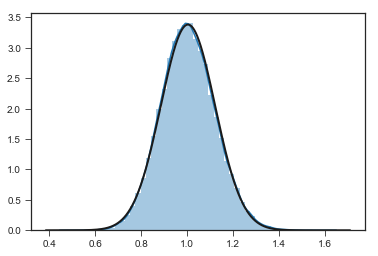

In [48]:
sns.distplot(slopes)

xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,10000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [121]:
n_cells = 10**7
# starting_freq = 0.001
fitness_effect = 1.0
time = 1
n_samples = 10**5
cov = 10**7

starting_freqs = np.logspace(-4,-1,20)
# starting_freqs = np.linspace(10**-6,0.5,12)
fitness_effects = [0.0,0.5,1.0,1.5,2.0]

standards = np.zeros((len(starting_freqs),len(fitness_effects)))
for sf,starting_freq in enumerate(starting_freqs):
    for f,fitness_effect in enumerate(fitness_effects):

        ending_freq = starting_freq*np.exp(fitness_effect*time)
        s = np.random.poisson(cov*starting_freq,n_samples)
        e = np.random.poisson(cov*ending_freq,n_samples)
        slopes = (1.0/time)*(np.log(e/cov)-np.log(s/cov))
        mu, std = norm.fit(slopes)
        
#         if str(std) != 'nan': 
#             plt.figure()

#             sns.distplot(slopes)
#             xmin,xmax = plt.xlim()
#             x = np.linspace(xmin,xmax,10000)
#             p = norm.pdf(x, mu, std)
#             plt.plot(x, p, 'k', linewidth=2)
        
        standards[sf,f] = std

In [122]:
standards

array([[0.04471036, 0.04017294, 0.03693936, 0.03499791, 0.03368027],
       [0.03729857, 0.03343679, 0.03076932, 0.02912863, 0.02807087],
       [0.03101973, 0.02779337, 0.02576025, 0.02439413, 0.02335045],
       [0.02586748, 0.0233449 , 0.02132128, 0.02027364, 0.0195781 ],
       [0.02161388, 0.01940333, 0.01786278, 0.01682275, 0.01631575],
       [0.01799979, 0.01621343, 0.01492991, 0.01403561, 0.0135515 ],
       [0.01495526, 0.01347586, 0.01245933, 0.01174006, 0.01130433],
       [0.01254382, 0.01120344, 0.01036173, 0.00980679, 0.00943937],
       [0.01047534, 0.00938309, 0.00863002, 0.00816546, 0.00787241],
       [0.00870895, 0.00781161, 0.00718076, 0.00680473, 0.00655655],
       [0.00726127, 0.00651162, 0.00598954, 0.0056565 , 0.00544847],
       [0.00605409, 0.00543423, 0.0050139 , 0.0047149 , 0.00456427],
       [0.00504844, 0.00453167, 0.00418151, 0.00395814, 0.00381636],
       [0.00422054, 0.00378995, 0.00347173, 0.00328265, 0.00317126],
       [0.00351526, 0.00314545, 0.

In [123]:
e

array([7391269, 7392632, 7390120, ..., 7385958, 7388298, 7387674])

Text(0,0.5,'Standard Deviation')

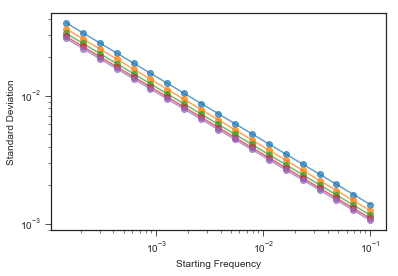

In [124]:
start = 1

for f in range(len(fitness_effects)):
    p = plt.plot(starting_freqs[start:],standards[:,f][start:],'o',alpha=0.7)
    this_fit = np.polyfit(np.log(starting_freqs[start:]),np.log(standards[:,f][start:]),1)
    plt.plot(starting_freqs[start:],
             [np.exp(this_fit[1])*s**(this_fit[0]) for s in starting_freqs[start:]],
            color=p[0].get_color(),alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Starting Frequency')
plt.ylabel('Standard Deviation')

In [125]:
for f in range(len(fitness_effects)):
    this_fit = np.polyfit(np.log(starting_freqs[start:]),np.log(standards[:,f][start:]),1)
    print(this_fit)

[-0.49978911 -7.71137189]
[-0.50040939 -7.82383208]
[-0.50004465 -7.90338036]
[-0.50017907 -7.9607034 ]
[-0.499959   -7.99580145]


In [101]:
np.log(starting_freqs[start:])

array([-13.20956711, -12.60362367, -11.99768022, -11.39173678,
       -10.78579333, -10.17984988,  -9.57390644,  -8.96796299,
        -8.36201955,  -7.7560761 ,  -7.15013266,  -6.54418921,
        -5.93824577,  -5.33230232,  -4.72635888,  -4.12041543,
        -3.51447198,  -2.90852854,  -2.30258509])

In [102]:
np.log(standards[:,f][start:])

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, -1.21597526, -1.54554314, -1.86401414, -2.17439179,
       -2.47899172, -2.78229708, -3.08465334, -3.38648662])

Text(0,0.5,'Variance')

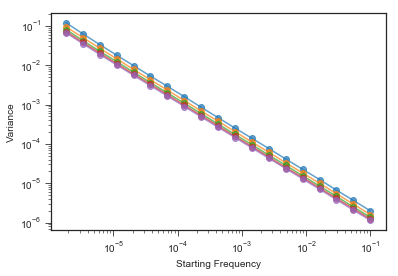

In [57]:
start = 1

for f in range(len(fitness_effects)):
    plt.plot(starting_freqs[start:],standards[:,f][start:]**2,'o-',alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Starting Frequency')
plt.ylabel('Variance')

In [8]:
std

nan

In [9]:
s

array([12,  9,  7, ..., 11, 11, 11])

In [10]:
f

0

In [11]:
starting_freqs

[0.0001, 0.001, 0.01, 0.1]